<a href="https://colab.research.google.com/github/fauzan-nf/github-slideshow/blob/master/Project_1_Membuat_Model_NLP_dengan_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Diri

Nama : Nurfaudzan 

Email : faudzan.46@gmail.com

# Load Dataset

Mengambil dataset

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
train_text = pd.read_csv('/content/drive/MyDrive/Dataset/train.txt',
                         header=None,
                         sep=';',
                         names=['Input','Sentiment',])
print('Train=', len(train_text))

Train= 16000


In [3]:
category = pd.get_dummies(train_text.Sentiment)
train_baru = pd.concat([train_text, category], axis=1)
train_baru = train_baru.drop(columns='Sentiment')
train_baru

,Input,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [4]:
train_text.Sentiment.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

In [5]:
sinopsis = train_baru['Input'].values
label = train_baru[['anger',	'fear',	'joy',	'love',	'sadness',	'surprise']].values

Membagi dataset

In [6]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

# Tokenization

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih) 
tokenizer.fit_on_texts(sinopsis_test)
 
sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [8]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nAkurasi Validasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [10]:
num_epochs = 50
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test),
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/50
400/400 - 14s - loss: 1.4391 - accuracy: 0.3629 - val_loss: 1.1795 - val_accuracy: 0.3781
Epoch 2/50
400/400 - 12s - loss: 1.0608 - accuracy: 0.4973 - val_loss: 1.0042 - val_accuracy: 0.6247
Epoch 3/50
400/400 - 12s - loss: 0.6248 - accuracy: 0.7779 - val_loss: 0.5473 - val_accuracy: 0.8206
Epoch 4/50
400/400 - 12s - loss: 0.3649 - accuracy: 0.8801 - val_loss: 0.4009 - val_accuracy: 0.8672
Epoch 5/50
400/400 - 12s - loss: 0.2116 - accuracy: 0.9305 - val_loss: 0.3647 - val_accuracy: 0.8863
Epoch 6/50
400/400 - 12s - loss: 0.1574 - accuracy: 0.9449 - val_loss: 0.3662 - val_accuracy: 0.8850
Epoch 7/50
400/400 - 12s - loss: 0.1161 - accuracy: 0.9591 - val_loss: 0.3964 - val_accuracy: 0.8922
Epoch 8/50
400/400 - 12s - loss: 0.0916 - accuracy: 0.9660 - val_loss: 0.3485 - val_accuracy: 0.8969
Epoch 9/50
400/400 - 12s - loss: 0.0740 - accuracy: 0.9737 - val_loss: 0.3717 - val_accuracy: 0.8975
Epoch 10/50
400/400 - 12s - loss: 0.0644 - accuracy: 0.9761 - val_loss: 0.4085 - val_accura

In [11]:
import matplotlib.pyplot as plt

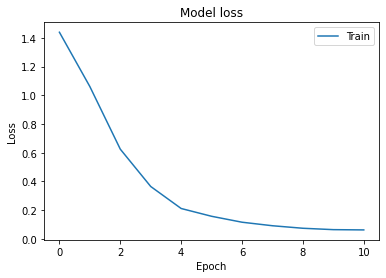

In [12]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

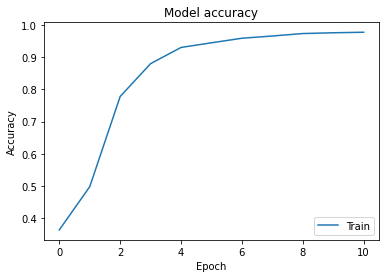

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

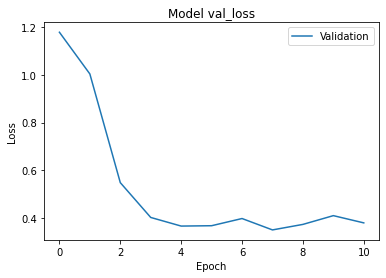

In [14]:
plt.plot(history.history['val_loss'])
plt.title('Model val_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper right')
plt.show()

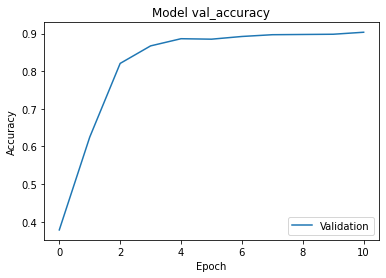

In [15]:
plt.plot(history.history['val_accuracy'])
plt.title('Model val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='lower right')
plt.show()